In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [6]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
dataset.loc[:122,'Region']=0
dataset.loc[122:,'Region']=1
df=dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [9]:
df[['Region']]=df[['Region']].astype(int)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [12]:
df=df.dropna().reset_index(drop=True)

In [13]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [15]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [16]:
df=df.drop(122).reset_index(drop=True)

In [17]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [19]:
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


In [21]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


In [23]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [24]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [25]:
df['FFMC'].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [26]:
df['DMC'].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6', '18',
       '19.4', '21.1', '23.9', '27.8', '32.7', '39.6', '44.

In [27]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [28]:
df['ISI'].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [29]:
df['BUI'].unique()

array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
       '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
       '5.1', '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8',
       '29.7', '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1',
       '15.4', '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1',
       '14.2', '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9',
       '29.4', '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2',
       '14.1', '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22',
       '17.6', '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5',
       '50.9', '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1',
       '5.6', '2.6', '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2',
       '12.9', '9.6', '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3',
       '13.1', '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7',
       '16.4', '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7',
      

In [30]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', '14.1', '9.1', '13', '17.3', '30',
       '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6', '12.7',
       '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3', '12.2',
       '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16', '19.4',
       '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5', '15.4', '1

In [31]:
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [33]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [34]:
# df['Classes']=df['Classes'].str.strip()
# df['Classes'].unique()

### EDA

In [35]:
df1 = df.drop(['day','month','year'], axis=1)

In [36]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [37]:
df1['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [38]:
df1['Classes']=np.where(df1['Classes'].str.contains('not fire'),0,1)

In [39]:
df1

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [40]:
df1['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

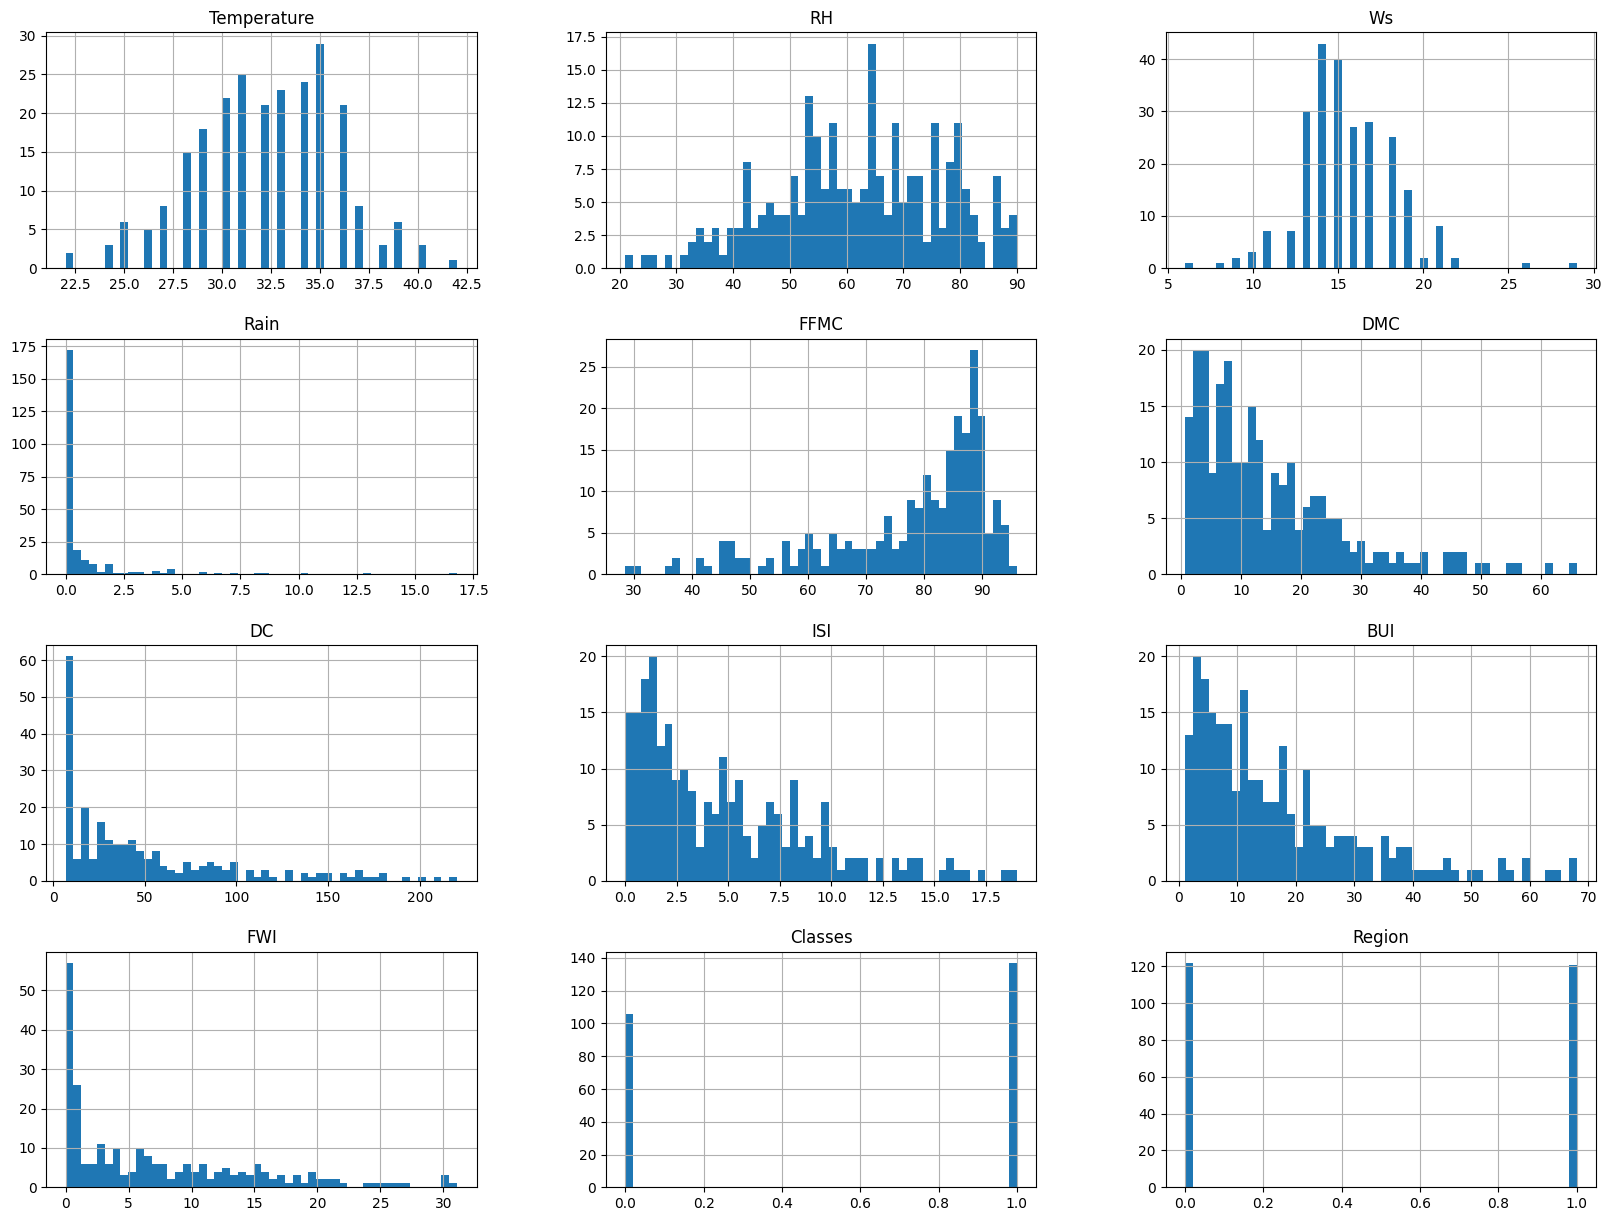

In [41]:
df1.hist(bins=50,figsize=(20,15))
plt.show()

In [42]:
percentage = df1['Classes'].value_counts(normalize=True)*100

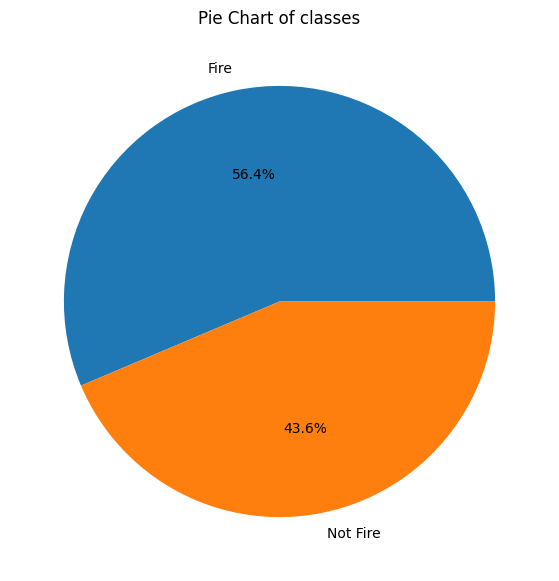

In [43]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlabels, autopct='%1.1f%%')
plt.title('Pie Chart of classes')
plt.show()

In [44]:
df1.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


In [45]:
df1.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


<Axes: >

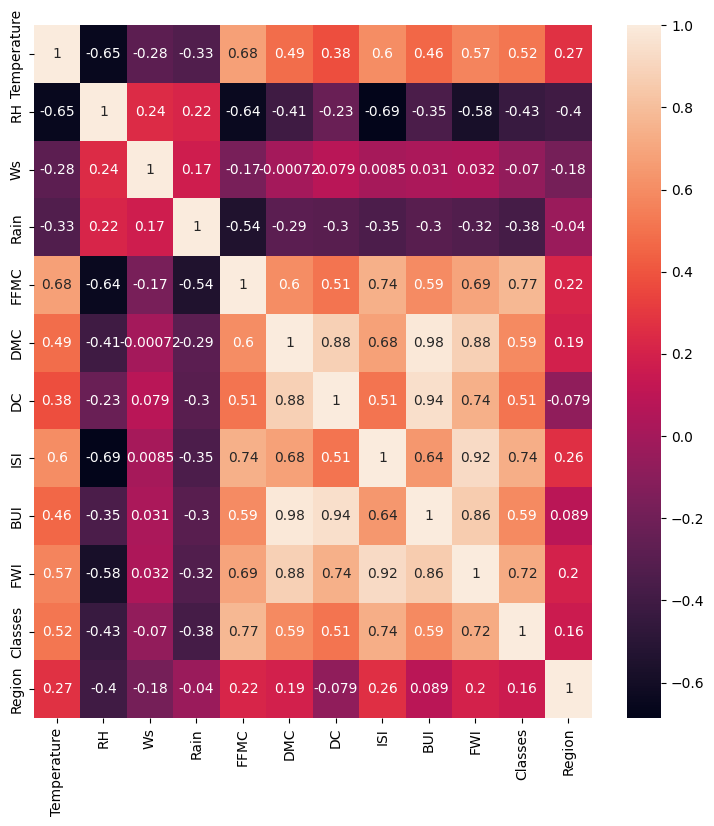

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(df1.corr(), annot=True)

<Axes: ylabel='FWI'>

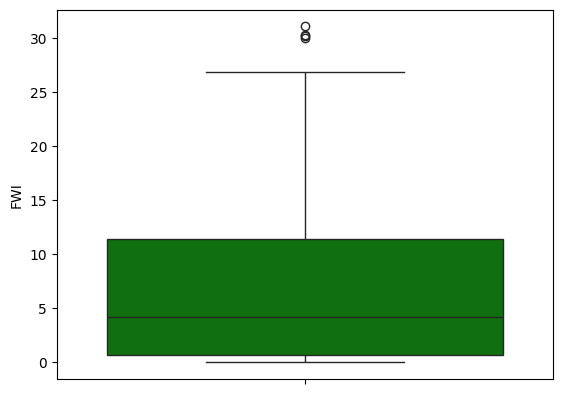

In [47]:
sns.boxplot(df1['FWI'],color='green')

In [48]:
df1.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [49]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'OF Brjaia Regions')

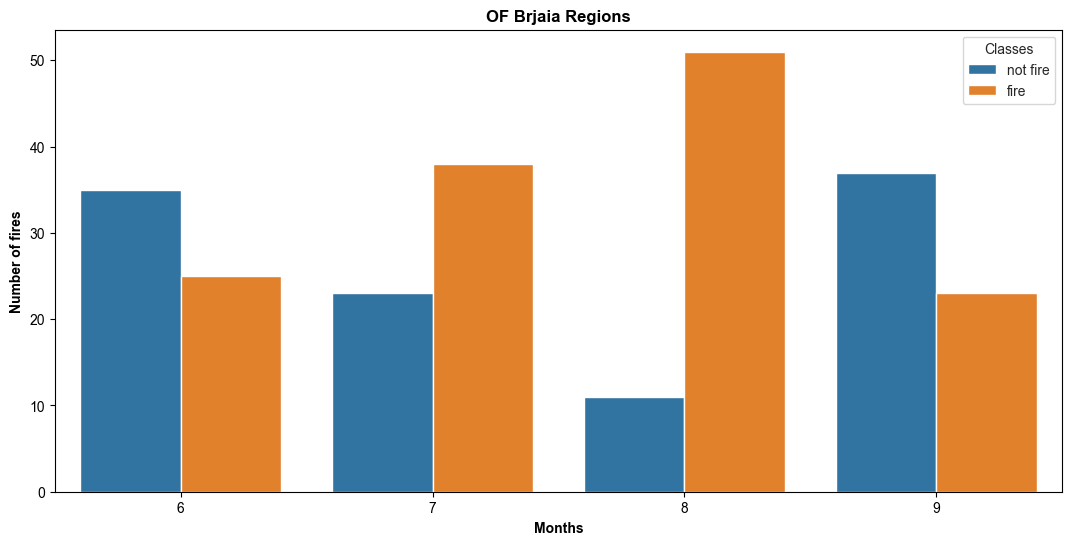

In [50]:
## monthly fire analysis

dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('OF Brjaia Regions', weight='bold')

Text(0.5, 1.0, 'OF Sidi-Bel Regions')

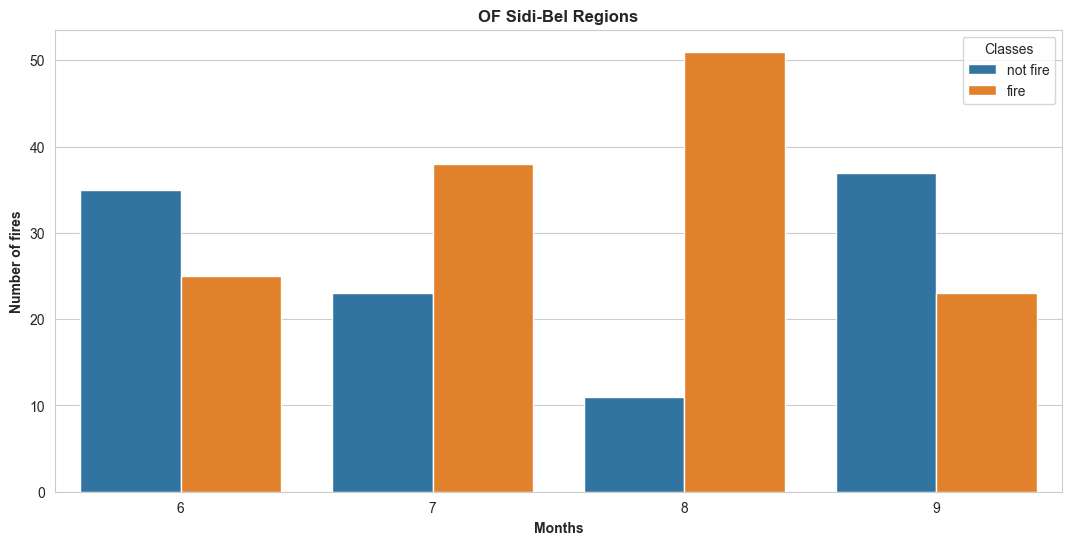

In [51]:
## monthly fire analysis

dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)
plt.ylabel('Number of fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title('OF Sidi-Bel Regions', weight='bold')

## 29.4 - FURTHER model work

In [52]:
X = df1.drop(['FWI'],axis=1)
y = df1['FWI']

In [53]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [54]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=65)

In [56]:
X_train.shape, X_test.shape

((194, 11), (49, 11))

In [57]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.622039,-0.248594,-0.257775,0.627251,0.472355,0.376103,0.575594,0.452254,0.484187,0.219135
RH,-0.622039,1.000000,0.175655,0.153921,-0.629086,-0.420507,-0.255720,-0.674511,-0.374967,-0.406028,-0.373095
Ws,-0.248594,0.175655,1.000000,-0.017839,-0.109983,0.020105,0.097938,0.072447,0.051295,-0.009428,-0.120688
Rain,-0.257775,0.153921,-0.017839,1.000000,-0.545060,-0.313159,-0.337084,-0.379559,-0.330864,-0.402253,0.080024
FFMC,0.627251,-0.629086,-0.109983,-0.545060,1.000000,0.609710,0.532496,0.750338,0.606660,0.772300,0.159698
DMC,0.472355,-0.420507,0.020105,-0.313159,0.609710,1.000000,0.879840,0.695535,0.983051,0.591110,0.187290
DC,0.376103,-0.255720,0.097938,-0.337084,0.532496,0.879840,1.000000,0.552492,0.942082,0.549328,-0.070390
ISI,0.575594,-0.674511,0.072447,-0.379559,0.750338,0.695535,0.552492,1.000000,0.673234,0.739037,0.202375
BUI,0.452254,-0.374967,0.051295,-0.330864,0.606660,0.983051,0.942082,0.673234,1.000000,0.605806,0.090771
Classes,0.484187,-0.406028,-0.009428,-0.402253,0.772300,0.591110,0.549328,0.739037,0.605806,1.000000,0.090777


### Multi collinearity
#### the domain expert will decide a threshold value and above that threshold value of any correlation value lies then those two features can be taken as a single feature as they are very similar to each other and give no unique aspect from each other

<Axes: >

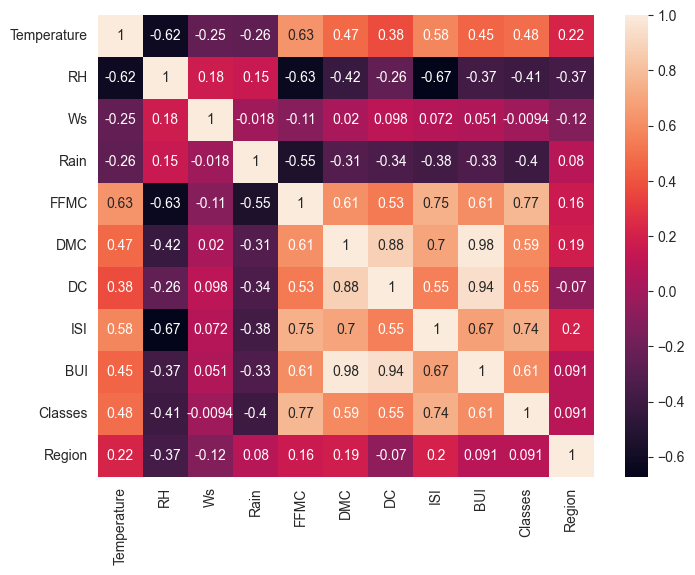

In [58]:
plt.figure(figsize=(8,6))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [59]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [60]:
corr_features = correlation(X_train,0.85)

In [61]:
corr_features

{'BUI', 'DC'}

In [62]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((194, 9), (49, 9))

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
X_train_scaled

array([[-0.6285885 , -0.26686338, -1.31859186, ..., -0.92931972,
        -1.15643824,  0.97958969],
       [ 0.79601628, -1.22941445,  0.61056969, ...,  0.14006194,
         0.86472409,  0.97958969],
       [-0.05874659,  0.76444133, -0.16109493, ...,  0.18867019,
         0.86472409, -1.02083557],
       ...,
       [ 0.79601628,  0.07690485, -0.54692724, ..., -0.75919082,
        -1.15643824, -1.02083557],
       [-0.34366755, -0.54187797, -1.70442417, ..., -0.56475779,
        -1.15643824, -1.02083557],
       [-0.91350946,  0.55818039, -0.54692724, ..., -0.39462889,
         0.86472409, -1.02083557]])

Text(0.5, 1.0, 'X_train after scaling')

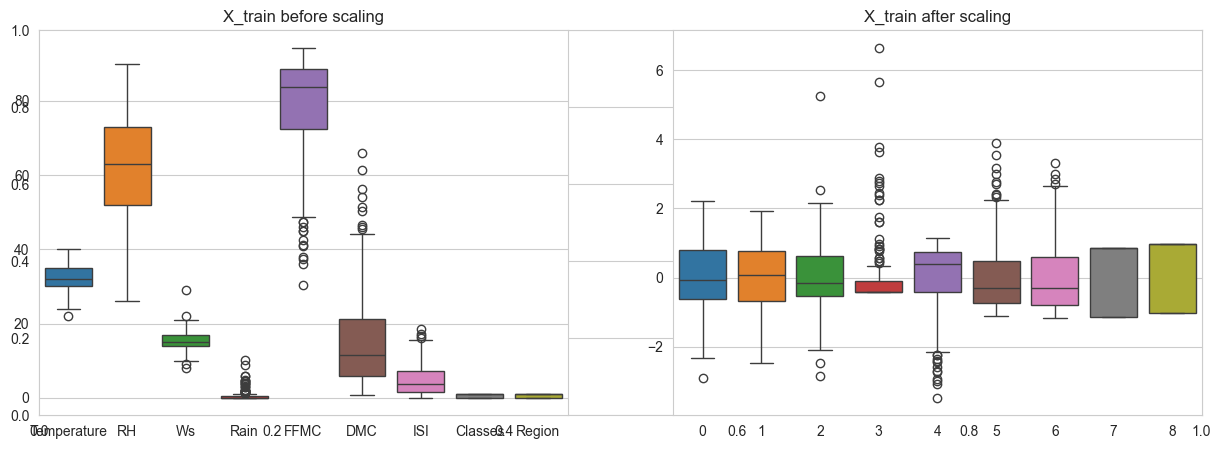

In [65]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

##### Linear Regression

mae:  0.8215574900431296
r2:  0.8524452984406776


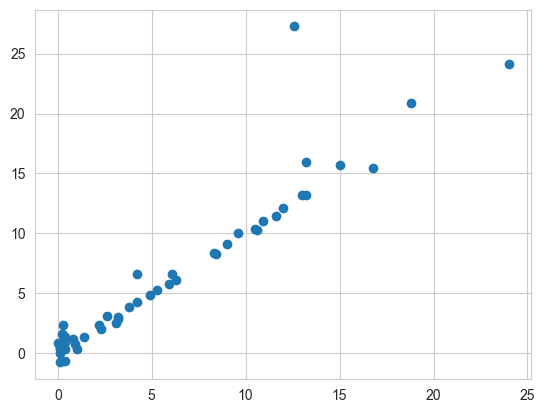

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

#### Lasso

mae:  1.021429035834544
r2:  0.8968525498486842


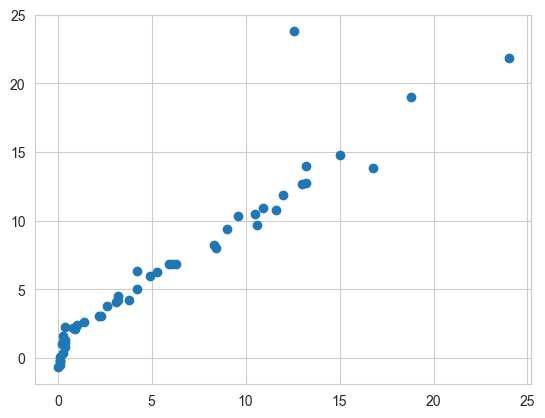

In [67]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

#### Lasso Cross Validation

In [68]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [69]:
lassocv.alpha_

0.02724389859807922

In [70]:
lassocv.alphas_

array([7.23621862, 6.74852171, 6.29369393, 5.86952002, 5.47393402,
       5.10500919, 4.76094865, 4.44007665, 4.14083034, 3.86175224,
       3.60148306, 3.35875516, 3.1323863 , 2.92127395, 2.72438986,
       2.5407751 , 2.36953536, 2.20983661, 2.06090102, 1.92200319,
       1.79246661, 1.67166036, 1.55899604, 1.45392493, 1.35593525,
       1.26454976, 1.17932333, 1.09984089, 1.02571529, 0.95658552,
       0.89211485, 0.8319893 , 0.775916  , 0.72362186, 0.67485217,
       0.62936939, 0.586952  , 0.5473934 , 0.51050092, 0.47609487,
       0.44400766, 0.41408303, 0.38617522, 0.36014831, 0.33587552,
       0.31323863, 0.29212739, 0.27243899, 0.25407751, 0.23695354,
       0.22098366, 0.2060901 , 0.19220032, 0.17924666, 0.16716604,
       0.1558996 , 0.14539249, 0.13559353, 0.12645498, 0.11793233,
       0.10998409, 0.10257153, 0.09565855, 0.08921149, 0.08319893,
       0.0775916 , 0.07236219, 0.06748522, 0.06293694, 0.0586952 ,
       0.05473934, 0.05105009, 0.04760949, 0.04440077, 0.04140

In [71]:
lassocv.mse_path_

array([[31.15340408, 68.97117798, 90.89070241, 53.52501908, 54.70049369],
       [27.89592179, 62.31631652, 90.89070241, 46.5712351 , 48.04095785],
       [24.88332864, 56.47480549, 90.39556752, 40.50958898, 42.28655105],
       [21.83878446, 51.34430765, 79.7921126 , 35.24758113, 37.15376376],
       [19.18467594, 46.83557252, 69.9499344 , 30.68038177, 32.09442925],
       [16.87047037, 42.87074814, 61.31639531, 26.71684874, 27.72194   ],
       [14.85228572, 39.38191166, 53.78811195, 23.27777014, 23.94486637],
       [13.09192936, 35.97622773, 47.22230457, 20.29427833, 20.68363692],
       [11.5559661 , 31.67020306, 41.49466094, 17.70651478, 17.86998042],
       [10.21586924, 27.91347453, 36.4974837 , 15.46246147, 15.44380949],
       [ 9.04623165, 24.6351814 , 32.13652005, 13.51689806, 13.35323795],
       [ 8.0251263 , 21.77286158, 28.32989139, 11.83052809, 11.55323349],
       [ 7.13346381, 19.27477237, 25.00613616, 10.36920168, 10.00471823],
       [ 6.35462384, 17.09323638, 22.1

mae:  0.7841684753338234
r2:  0.8578115007057828


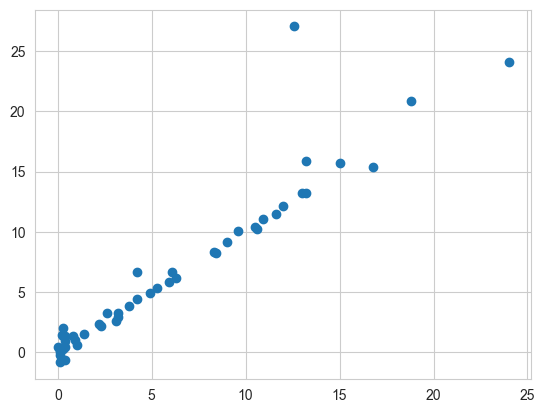

In [72]:
y_pred = lassocv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

#### Ridge

mae:  0.8066132314118604
r2:  0.8569725930201825


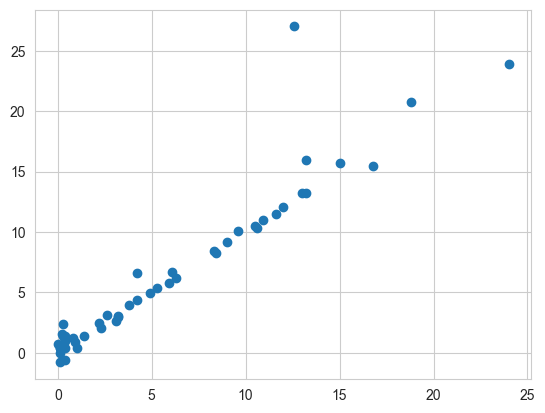

In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

mae:  0.8193974006673572
r2:  0.8529190387447487


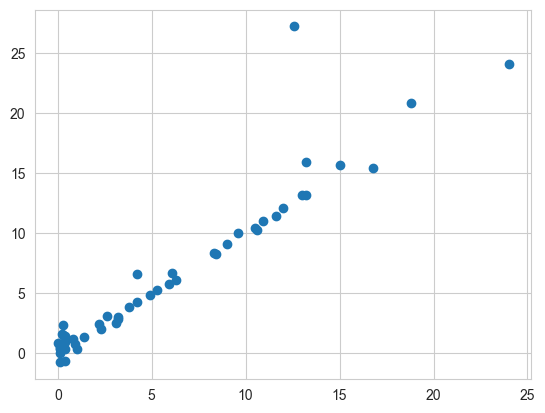

In [74]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)
y_pred = ridgecv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

In [75]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

#### ElasticNet

mae:  1.4294091065456032
r2:  0.8951383181798072


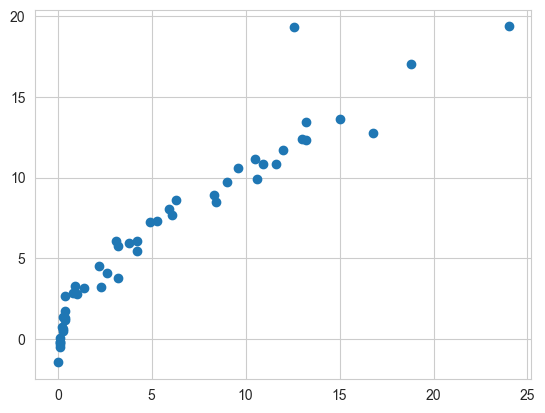

In [76]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

mae:  0.7921701548251329
r2:  0.8596312359361402


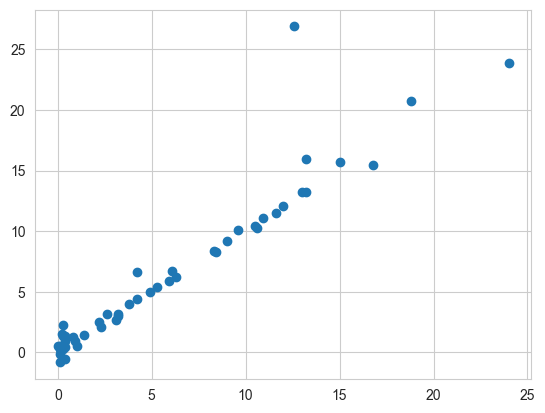

In [77]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('mae: ', mae)
print('r2: ', r2)
plt.scatter(y_test, y_pred)

### Pickle the ml model and preprocessing model standardscaler

In [78]:
scaler

StandardScaler()

In [79]:
lasso

Lasso()

In [80]:
ridge

Ridge()

In [84]:
import pickle
pickle.dump(scaler,open('../models/scaler.pkl','wb'))
pickle.dump(ridge,open('../models/ridge.pkl','wb'))
pickle.dump(lasso,open('../models/lasso.pkl','wb'))